# Programming Assignment 2: Linear Regression

## Instructions

- The aim of this assignment is to give you a hands-on with a real-life machine learning application.
- Use separate training, and testing data as discussed in class.
- You can only use Python programming language and Jupyter Notebooks.
- There are three parts of this assignment. In parts 1 & 2, you can only use **numpy, scipy, pandas, matplotlib and are not allowed to use NLTK, scikit-learn or any other machine learning toolkit**. However, you have to use **scikit-learn** in part 3.
- Carefully read the submission instructions, plagiarism and late days policy below.
- Deadline to submit this assignment is: **Friday, 30th October 2020**.

## Submission Instructions

Submit your code both as notebook file (.ipynb) and python script (.py) on LMS. The name of both files should be your roll number. If you don’t know how to save .ipynb as .py [see this](https://i.stack.imgur.com/L1rQH.png). **Failing to submit any one of them will result in the reduction of marks**.

## Plagiarism Policy

The code MUST be done independently. Any plagiarism or cheating of work from others or the internet will be immediately referred to the DC. If you are confused about what constitutes plagiarism, it is YOUR responsibility to consult with the instructor or the TA in a timely manner. No “after the fact” negotiations will be possible. The only way to guarantee that you do not lose marks is “DO NOT LOOK AT ANYONE ELSE'S CODE NOR DISCUSS IT WITH THEM”.

## Late Days Policy

The deadline of the assignment is final. However, in order to accommodate all the 11th hour issues there is a late submission policy i.e. you can submit your assignment within 3 days after the deadline with 25% deduction each day.


## Introduction

In this exercise, you will implement linear regression and get to see it work on data. After completing this assignment, you will know:
- How to implement linear regression from scratch.
- How to estimate linear regression parameters using gradient descent.
- How to make predictions on new data using learned parameters.

Let's start with the necessary imports.

In [1]:
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline

## 1. Linear Regression with one variable

Linear regression assumes a linear relationship between the input variables (X) and the single output variable (Y). More specifically, that output (Y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

Now you will implement simple linear regression to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

### 1.1 Load the dataset

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `X` and `Y`.

In [2]:
data = np.loadtxt(os.path.join('Data', 'ex1data.txt'), delimiter=',')
X, Y = data[:, 0], data[:, 1]

### 1.2 Plot the dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Execute the next cell to visualize the data.

Text(0.5, 0, 'Population of City in 10,000s')

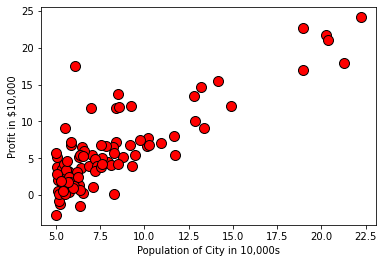

In [3]:
pyplot.plot(X, Y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')

### 1.3 Learn the parameters
In this part, you will fit the linear regression parameters $\theta$ to the food truck dataset using gradient descent.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 ------ (i)$$ 

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x ------ (ii)$$

The parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right) ------ (iii)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x^{(i)} ------ (iv)$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

Let's start by implementing the hypothesis $h_\theta(x)$.

In [4]:
### GRADED FUNCTION ###
def predict(x, theta0, theta1):
    '''
    Calculates the hypothesis for any input sample `x` given the parameters `theta`.
    
    Arguments
    ---------
    x : float
        The input sample.
    
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    Returns
    -------
    h_x : float
        The hypothesis for input sample.
    
    Hint(s)
    -------
    Compute equation (ii).
    '''
    # You need to return the following variable(s) correctly
    h_x = theta0+theta1*x
    
    ### START CODE HERE ### (≈ 1 line of code)
    
    ### END CODE HERE ###
    
    return h_x

Execute the next cell to verify your implementation.

In [5]:
h_x = predict(x=2, theta0=1.0, theta1=1.0)
print('With x = 2, theta0 = 1.0, theta1 = 1.0\nPredicted Hypothesis h(x) = %.2f' % h_x)
print("Expected hypothesis h(x) = 3.00\n")

With x = 2, theta0 = 1.0, theta1 = 1.0
Predicted Hypothesis h(x) = 3.00
Expected hypothesis h(x) = 3.00



As you perform gradient descent to learn minimize the cost function  $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate  $J(\theta)$ so you can check the convergence of your gradient descent implementation.

In [6]:
### GRADED FUNCTION ###
def computeCost(X, Y, theta0, theta1):
    '''
    Computes cost for linear regression. Computes the cost of using `theta` as the
    parameter for linear regression to fit the data points in `X` and `Y`.
    
    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.
    
    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.
    
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Hint(s)
    -------
    Compute equation (i).
    '''
    # initialize some useful values
    m = Y.size  # number of training examples
    h_x = predict(X,theta0,theta1)
    
    # You need to return the following variable(s) correctly
    J = 1/(2*m)*np.sum(np.square(h_x-Y))
        
    ### START CODE HERE ### (≈ 3-4 lines of code)
    
        
    
    
    ### END CODE HERE ###
    
    return J

Execute the next cell to verify your implementation.

In [7]:
J = computeCost(X, Y, theta0=1.0, theta1=1.0)
print('With theta0 = 1.0, theta1 = 1.0\nPredicted cost J = %.2f' % J)
print("Expected cost J = 10.27\n")

With theta0 = 1.0, theta1 = 1.0
Predicted cost J = 10.27
Expected cost J = 10.27



Next, you will complete a function which implements gradient descent. The loop structure has been written for you, and you only need to supply the updates to parameters $\theta_j$  within each iteration (epoch). 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented `gradientDescent` and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [8]:
### GRADED FUNCTION ###
def gradientDescent(X, Y, alpha, n_epoch):
    """
    Performs gradient descent to learn `theta`. Updates `theta` by taking `n_epoch`
    gradient steps with learning rate `alpha`.
    
    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.
    
    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.
    
    alpha : float
        The learning rate.
    
    n_epoch : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    J : list
        A python list for the values of the cost function after each iteration.
    
    Hint(s)
    -------
    Compute equation (iii) and (iv).

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) here.
    """
    # initialize some useful values
    m = Y.size  # number of training examples
    J = list()  # list to store cost
    
    # You need to return the following variables correctly
    theta0 = 0.0
    theta1 = 0.0
    
    for epoch in range(n_epoch):
        ### START CODE HERE ### (≈ 5-10 lines of code)
        
        h_x = predict(X,theta0,theta1)
        
        diff_0 = alpha*1/m*np.sum(h_x-Y)
        diff_1 = alpha*1/m*np.sum((h_x-Y)*X)
        
        theta0 = theta0 - diff_0
        theta1 = theta1 - diff_1
        
        
        
        
        
        
        
        
        ### END CODE HERE ###

        J.append(computeCost(X, Y, theta0, theta1))
    return theta0, theta1, J

Execute the next cell to verify your implementation.

In [9]:
n_epoch = 1500
alpha = 0.01

theta0, theta1, J = gradientDescent(X ,Y, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))
print('Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834')

Predicted theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834
Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834


### 1.4 Plot the linear fit

Use your learned parameters $\theta_j$ to plot the linear fit.

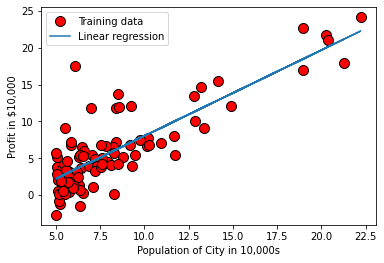

In [10]:
h_x = list()
for x in X:
    h_x.append(predict(x, theta0, theta1))
pyplot.plot(X, Y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')
pyplot.plot(X, h_x, '-')
pyplot.legend(['Training data', 'Linear regression'])

### 1.5 Make predictions

Use your learned parameters $\theta_j$ to make food truck profit predictions in areas with population of 40,000 and 65,000.

In [11]:
print('For population = 40,000, predicted profit = $%.2f' % (predict(4, theta0, theta1)*10000))
print('For population = 65,000, predicted profit = $%.2f' % (predict(6.5, theta0, theta1)*10000))

For population = 40,000, predicted profit = $10351.58
For population = 65,000, predicted profit = $39510.64


## 2. Multivariate Linear Regression

Now, you will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s. To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set. Expected Mean Square Error on this dataset is 11.5 - 12.5 approximately. 

We provide you with the code needed to load this dataset. The dataset is loaded from the data files into the variables `train_X`, `train_Y`, `test_X` and `test_Y`.

In [12]:
train_X = np.loadtxt(os.path.join('Data', 'ex2traindata.txt'))
train_Y = np.loadtxt(os.path.join('Data', 'ex2trainlabels.txt'))
test_X = np.loadtxt(os.path.join('Data', 'ex2testdata.txt'))
test_Y = np.loadtxt(os.path.join('Data', 'ex2testlabels.txt'))

In [13]:
train_X.shape

(404, 13)

In [15]:
''' Start your code of part 2 from here, add the new code cells as per your requirement. '''

class LinearRegression(object):
    
    def __init__(self,train_X,train_Y,test_X,test_Y):
        self.train_X = train_X
        self.train_Y = train_Y
        self.test_X = test_X
        self.test_Y = test_Y
        self.theetas = np.zeros((1,train_X.shape[1]))
        self.b = np.zeros((1,1))
        self.scaling()
        self.loss = self.fit(self.train_X,self.train_Y)
        #print("Loss=",self.loss)
        self.test(self.test_X,self.test_Y)
    
    
    def scaling(self):
        '''mean normalization'''
        mean = np.mean(train_X,axis = 0) #axis= 0 represent column
        std = np.std(train_X,axis=0) 
        self.train_X = (self.train_X-mean)/std
        self.test_X = (self.test_X-mean)/std

    def predict(self,X):
        h_x = np.dot(self.theetas,X.T)+self.b
        return h_x
    
    def fit(self,X,Y,alpha=0.1,n_epochs=3000):
        
        m = Y.shape[0]
        J = list()
        for epoch in range(n_epochs):
            h_x = self.predict(X)
            error = np.subtract(h_x,Y)
            gradients = 1/m*np.matmul(error,X)
            self.theetas = self.theetas-alpha*gradients
            self.b = self.b-alpha/m*np.sum(error) #bias gradient calculates separately
            loss = self.computeLoss(h_x,Y)
            J.append(loss)
        return J
    def computeLoss(self,h_x,Y):
        m = Y.shape[0]
        J = 1/(2*m)*np.sum(np.square(h_x-Y))
        return J
            
    def test(self,X,Y):
        h_x = self.predict(X)
        loss = self.computeLoss(h_x,Y)
        print("Expected Mean Square Error is:",loss)
        
ll = LinearRegression(train_X,train_Y,test_X,test_Y)
ll.scaling()


Expected Mean Square Error is: 11.597799627965387


## 3. Regularized Linear Regression

Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to Boston house pricing dataset (provided in part 2). Try out different values of regularization coefficient (known as alpha in scikit-learn) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression. Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [17]:
#As I did not change the orignal data scaling it to use for part 3 
mean = np.mean(train_X,axis = 0) #axis= 0 represent column
std = np.std(train_X,axis=0) 
train_X = (train_X-mean)/std
test_X = (test_X-mean)/std

In [18]:
''' Start your code of part 3 from here, add the new code cells as per your requirement. '''

' Start your code of part 3 from here, add the new code cells as per your requirement. '

In [19]:
def reportMSE(model,name):
    
    model.fit(train_X,train_Y)
    y_pred = model.predict(test_X)
    
   
    
    print("MSE for",name,":=",mean_squared_error(test_Y,y_pred))
    return model.coef_


def calculateMSE():
    model_name = ["Linear Regression","Ridge Regression","Lasso Regression","Elastic Net Regression"]
    models = [LinearRegression(),Ridge(),Lasso(),ElasticNet()]
    
    for i,model in enumerate(models):
        
       reportMSE(model,model_name[i])
    print()
calculateMSE()

MSE for Linear Regression := 23.195599256422966
MSE for Ridge Regression := 23.105483040456548
MSE for Lasso Regression := 24.169260051110417
MSE for Elastic Net Regression := 26.889176738407027



In [20]:
def tryDifferentAlphas():
    ridge_array = []
    lasso_array = []
    elastic_array = []
    alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,1000000,10000000]
    model_name = ["Ridge Regression","Lasso Regression","Elastic Net Regression"]
    
    for i in range(3):
        for alpha in alphas:       
            models = [Ridge(alpha=alpha),Lasso(alpha=alpha),ElasticNet(alpha=alpha)]
            model = (models[i])
            print("Alpha:=",alpha)
            coeff = reportMSE(model,model_name[i])
            print(coeff)
            print()
            
            if i==0:
                ridge_array.append(coeff)
            if i==1:
                lasso_array.append(coeff)
            if i==2:
                elastic_array.append(coeff)
    return np.array(ridge_array),np.array(lasso_array),np.array(elastic_array),np.log10(alphas)
    
ridge,lasso,elastic,alphas = tryDifferentAlphas()
    

Alpha:= 1e-05
MSE for Ridge Regression := 23.195598319887
[-1.10749182  1.35308942  0.027101    0.99435353 -2.40156519  2.39628784
  0.21119509 -3.47121591  2.90814783 -1.95741796 -1.98298534  0.81955093
 -4.02739053]

Alpha:= 0.0001
MSE for Ridge Regression := 23.19558989109674
[-1.10749077  1.3530875   0.02709868  0.99435378 -2.40156172  2.39628913
  0.21119405 -3.47121256  2.90813869 -1.95740956 -1.98298433  0.81955099
 -4.02738879]

Alpha:= 0.001
MSE for Ridge Regression := 23.19550560649569
[-1.10748033  1.35306835  0.02707541  0.99435629 -2.40152702  2.39630205
  0.21118369 -3.47117903  2.9080473  -1.95732556 -1.9829742   0.81955163
 -4.02737138]

Alpha:= 0.01
MSE for Ridge Regression := 23.194663090479573
[-1.10737589  1.3528769   0.02684288  0.99438142 -2.40118013  2.39643118
  0.21108005 -3.47084382  2.9071337  -1.95648601 -1.98287297  0.81955803
 -4.0271973 ]

Alpha:= 0.1
MSE for Ridge Regression := 23.186270772751943
[-1.10633425  1.35096778  0.02452778  0.99463097 -2.397716

In [21]:
labels = ["crime","zones","nrb","river","noc","avg num rooms","built beofre 1940","distance","index","tax rate","pupil teacher ratio","blacks","lower status"]

In [22]:
def Plotplot(array,alphas):    
    for i in range(13):
        pyplot.xlabel("Log alphas")
        pyplot.ylabel("Coefficient values")
        pyplot.title("Variation of coefficient values wrt to log alphas")
        pyplot.plot(alphas,array[:,i])
        pyplot.legend(labels,bbox_to_anchor=(1.05, 1), loc='upper left')
    


Plot for ridge regression


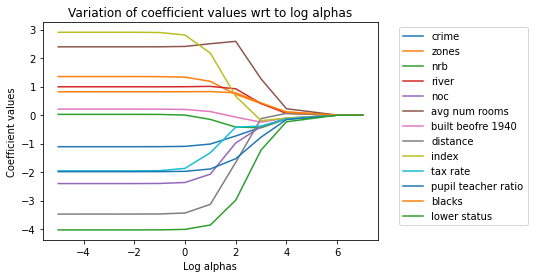

In [23]:
print("Plot for ridge regression")
Plotplot(ridge,alphas)

Plot for lasso regression


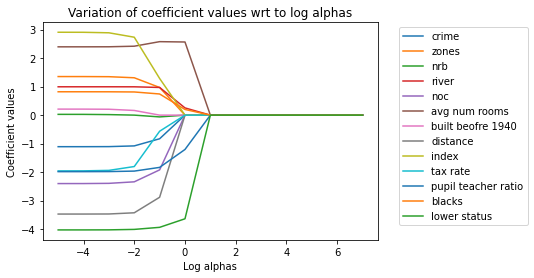

In [24]:
print("Plot for lasso regression")
Plotplot(lasso,alphas)

Plot for elastic regression


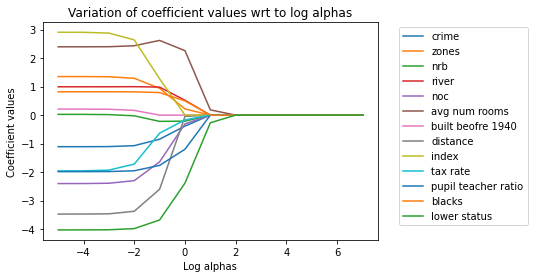

In [25]:
print("Plot for elastic regression")
Plotplot(elastic,alphas)